In [27]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns

In [2]:
from pymongo import MongoClient

def get_mongo_database(db_name, host='localhost', port=27017, username=None, password=None):
    if username and password:
        mongo_uri = 'mongodb://{}:{}@{}/()'.format(username, password, host, db_name)
        conn = MongoClient(mongo_uri)
    else:
        conn = MongoClient(host, port)
    
    return conn[db_name]

def mongo_to_dataframe(db_name, collection, query=None, host='localhost', port=27017,
                       username=None, password=None, no_id=True):
    db = get_mongo_database(db_name, host, port, username, password)
    
    if query == None:
        query = {}
    cursor = db[collection].find(query)
    df = pd.DataFrame(list(cursor))
    
    if no_id:
        del df['_id']
        
    return df

def dataframe_to_mongo(df, db_name, collection, host='localhost', port=27017,
                       username=None, password=None):
    db = get_mongo_database(db_name, host, port, username, password)
    
    records = df.to_dict('records')
    db[collection].insert_many(records)

In [3]:
df = mongo_to_dataframe('nobel_prize', 'winners')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875 entries, 0 to 874
Data columns (total 12 columns):
award_age         875 non-null int64
catagory          875 non-null object
country           875 non-null object
date_of_birth     875 non-null datetime64[ns]
date_of_death     875 non-null object
gender            875 non-null object
link              875 non-null object
name              875 non-null object
place_of_birth    875 non-null object
place_of_death    593 non-null object
text              875 non-null object
year              875 non-null int64
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 82.1+ KB


In [4]:
df.date_of_death = pd.to_datetime(df.date_of_death)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875 entries, 0 to 874
Data columns (total 12 columns):
award_age         875 non-null int64
catagory          875 non-null object
country           875 non-null object
date_of_birth     875 non-null datetime64[ns]
date_of_death     593 non-null datetime64[ns]
gender            875 non-null object
link              875 non-null object
name              875 non-null object
place_of_birth    875 non-null object
place_of_death    593 non-null object
text              875 non-null object
year              875 non-null int64
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 82.1+ KB


gender
female     48
male      827
dtype: int64

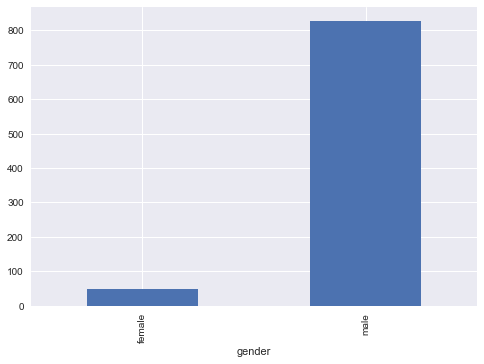

In [7]:
by_gender = df.groupby('gender')
by_gender.size().plot(kind='bar')
by_gender.size()

In [10]:
by_cat_gen = df.groupby(['catagory', 'gender'])
by_cat_gen.get_group(('Physics', 'female'))[['name', 'year']]

,name,year
137,Maria Goeppert-Mayer,1963
572,Marie Skłodowska-Curie,1903


In [11]:
by_cat_gen.size()

catagory                gender
Chemistry               female      4
                        male      170
Economic                female      1
                        male       78
Literature              female     14
                        male       96
Peace                   female     15
                        male       86
Physics                 female      2
                        male      201
Physiology or Medicine  female     12
                        male      196
dtype: int64

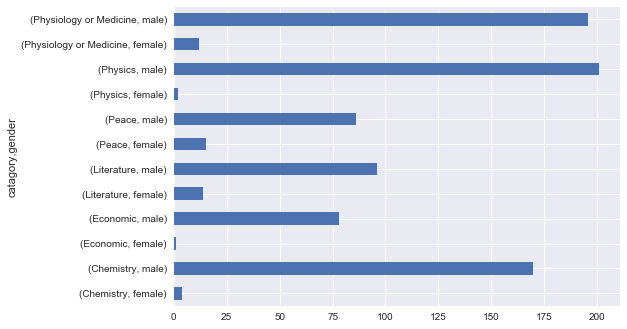

In [12]:
by_cat_gen.size().plot(kind='barh')

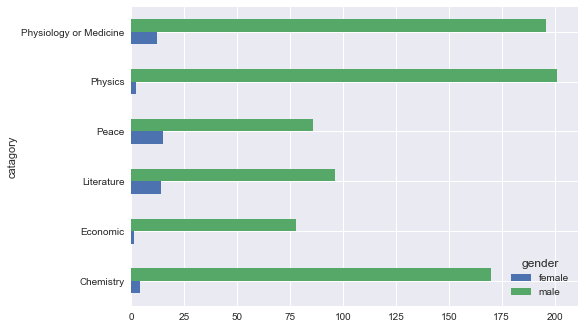

In [13]:
by_cat_gen.size().unstack().plot(kind='barh')

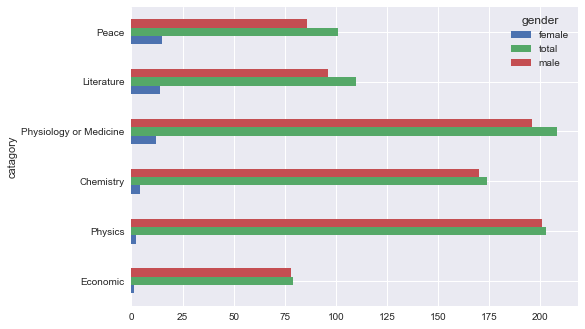

In [18]:
cat_gen_sz = by_cat_gen.size().unstack()
cat_gen_sz['total'] = cat_gen_sz.sum(axis=1)
cat_gen_sz = cat_gen_sz.sort_values(by='female', ascending=True)
cat_gen_sz[['female', 'total', 'male']].plot(kind='barh')

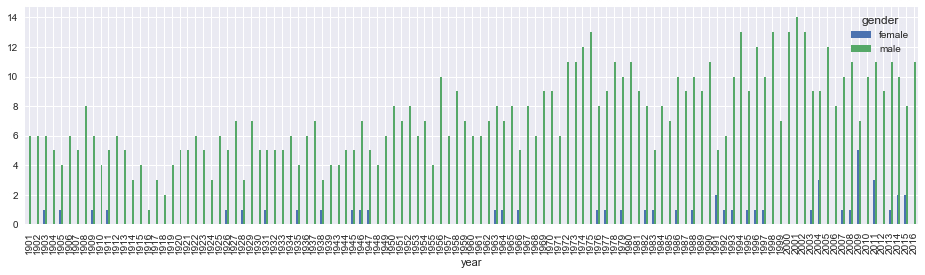

In [19]:
by_year_gender = df.groupby(['year', 'gender'])
year_gen_sz = by_year_gender.size().unstack()
year_gen_sz.plot(kind='bar', figsize=(16,4))

In [20]:
def thin_xticks(ax, tick_gap=10, rotation=45):
    ticks = ax.xaxis.get_ticklocs()
    ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
    ax.xaxis.set_ticks(ticks[::tick_gap])
    ax.xaxis.set_ticklabels(ticklabels[::tick_gap], rotation=rotation)
    ax.figure.show()

In [21]:
year_gen_sz

gender,female,male
year,,
1901,NaN,6.0
1902,NaN,6.0
1903,1.0,6.0
1904,NaN,5.0
1905,1.0,4.0
1906,NaN,6.0
1907,NaN,5.0
1908,NaN,8.0
1909,1.0,6.0


In [23]:
new_index = pd.Index(np.arange(1901, 2017), name='year')
by_year_gender = df.groupby(['year', 'gender'])
year_gen_sz = by_year_gender.size().unstack().reindex(new_index)
year_gen_sz

gender,female,male
year,,
1901,NaN,6.0
1902,NaN,6.0
1903,1.0,6.0
1904,NaN,5.0
1905,1.0,4.0
1906,NaN,6.0
1907,NaN,5.0
1908,NaN,8.0
1909,1.0,6.0


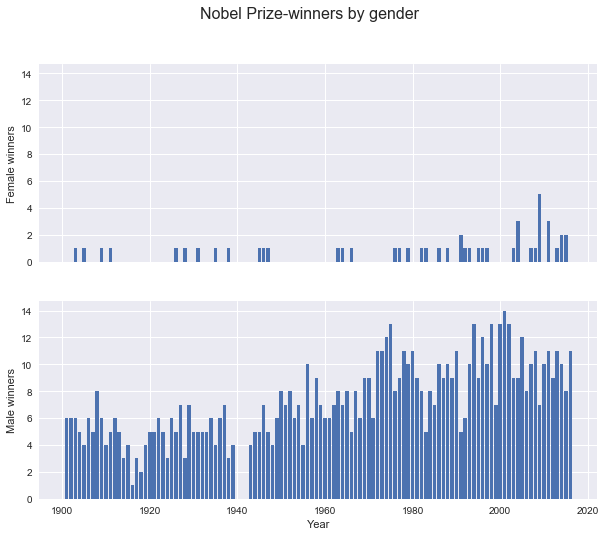

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(10,8))
ax_f = axes[0]
ax_m = axes[1]

fig.suptitle('Nobel Prize-winners by gender', fontsize=16)
ax_f.bar(year_gen_sz.index, year_gen_sz.female)
ax_f.set_ylabel('Female winners')

ax_m.bar(year_gen_sz.index, year_gen_sz.male)
ax_m.set_ylabel('Male winners')

ax_m.set_xlabel('Year')

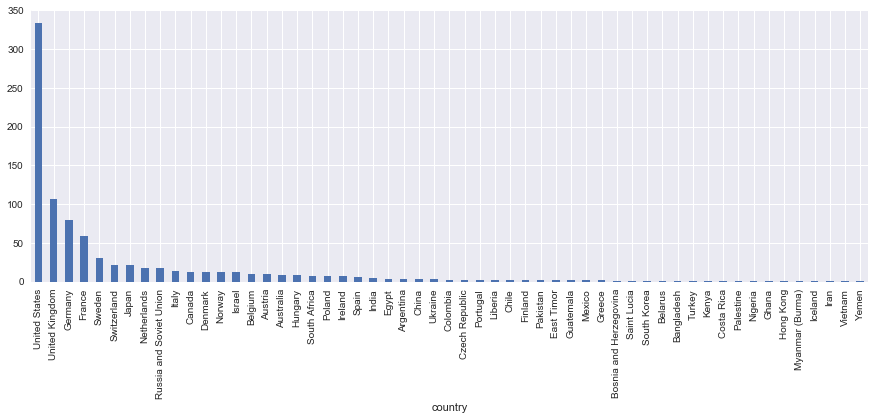

In [39]:
df.groupby('country').size().sort_values(ascending=False).plot(kind='bar', figsize=(15,5))

In [38]:
df.groupby('country').size().sort_values(ascending=False)

country
United States              334
United Kingdom             107
Germany                     80
France                      59
Sweden                      30
Switzerland                 22
Japan                       21
Netherlands                 18
Russia and Soviet Union     17
Italy                       14
Canada                      13
Denmark                     13
Norway                      13
Israel                      12
Belgium                     10
Austria                     10
Australia                    9
Hungary                      8
South Africa                 7
Poland                       7
Ireland                      7
Spain                        6
India                        5
Egypt                        4
Argentina                    4
China                        3
Ukraine                      3
Colombia                     2
Czech Republic               2
Portugal                     2
Liberia                      2
Chile                        2


In [42]:
nat_group = df.groupby('country')
ngsz = nat_group.size()
ngsz.index, len(ngsz.index)

(Index(['Argentina', 'Australia', 'Austria', 'Bangladesh', 'Belarus', 'Belgium',
        'Bosnia and Herzegovina', 'Canada', 'Chile', 'China', 'Colombia',
        'Costa Rica', 'Czech Republic', 'Denmark', 'East Timor', 'Egypt',
        'Finland', 'France', 'Germany', 'Ghana', 'Greece', 'Guatemala',
        'Hong Kong', 'Hungary', 'Iceland', 'India', 'Iran', 'Ireland', 'Israel',
        'Italy', 'Japan', 'Kenya', 'Liberia', 'Mexico', 'Myanmar (Burma)',
        'Netherlands', 'Nigeria', 'Norway', 'Pakistan', 'Palestine', 'Poland',
        'Portugal', 'Russia and Soviet Union', 'Saint Lucia', 'South Africa',
        'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine',
        'United Kingdom', 'United States', 'Vietnam', 'Yemen'],
       dtype='object', name='country'), 55)

In [41]:
df_countries = mongo_to_dataframe('nobel_prize', 'country_data')
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 22 columns):
alpha2Code        250 non-null object
alpha3Code        250 non-null object
altSpellings      250 non-null object
area              240 non-null float64
borders           250 non-null object
callingCodes      250 non-null object
capital           250 non-null object
currencies        250 non-null object
demonym           250 non-null object
gini              153 non-null float64
languages         250 non-null object
latlng            250 non-null object
name              250 non-null object
nativeName        250 non-null object
numericCode       249 non-null object
population        250 non-null int64
region            250 non-null object
relevance         249 non-null object
subregion         250 non-null object
timezones         250 non-null object
topLevelDomain    250 non-null object
translations      250 non-null object
dtypes: float64(2), int64(1), object(19)
memory usage: 43.

In [43]:
df_countries.ix[0]

alpha2Code                                                       AF
alpha3Code                                                      AFG
altSpellings                                       [AF, Afġānistān]
area                                                         652230
borders                              [IRN, PAK, TKM, UZB, TJK, CHN]
callingCodes                                                   [93]
capital                                                       Kabul
currencies                                                    [AFN]
demonym                                                      Afghan
gini                                                           27.8
languages                                              [ps, uz, tk]
latlng                                                 [33.0, 65.0]
name                                                    Afghanistan
nativeName                                                افغانستان
numericCode                                     

In [44]:
df.head()

,award_age,catagory,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year
0,53,Physics,Austria,1883-06-24,1964-12-17,male,https://en.wikipedia.org/wiki/Victor_Francis_Hess,Victor Francis Hess,Deutschfeistritz,Mount Vernon,"Victor Francis Hess , Physics, 1936",1936
1,46,Physics,Austria,1887-08-12,1961-01-04,male,https://en.wikipedia.org/wiki/Erwin_Schr%C3%B6...,Erwin Schrödinger,Vienna,Vienna,"Erwin Schrödinger , Physics, 1933",1933
2,62,Physiology or Medicine,Austria,1868-06-14,1943-06-26,male,https://en.wikipedia.org/wiki/Karl_Landsteiner,Karl Landsteiner,Vienna,New York City,"Karl Landsteiner , Physiology or Medicine, 1930",1930
3,70,Physiology or Medicine,Austria,1857-03-07,1940-09-27,male,https://en.wikipedia.org/wiki/Julius_Wagner-Ja...,Julius Wagner-Jauregg,Wels,Vienna,"Julius Wagner-Jauregg , Physiology or Medicine...",1927
4,54,Chemistry,Austria,1869-09-03,1930-12-13,male,https://en.wikipedia.org/wiki/Fritz_Pregl,Fritz Pregl,Ljubljana,Graz,"Fritz Pregl , born in then Austria-Hungary, n...",1923


In [55]:
df_countries = mongo_to_dataframe('nobel_prize', 'country_data')
df_countries = df_countries.set_index('name')
df_countries['nobel_wins'] = ngsz
df_countries['nobel_wins_per_capita'] = df_countries.nobel_wins / df_countries.population
df_countries.dropna(inplace=True)

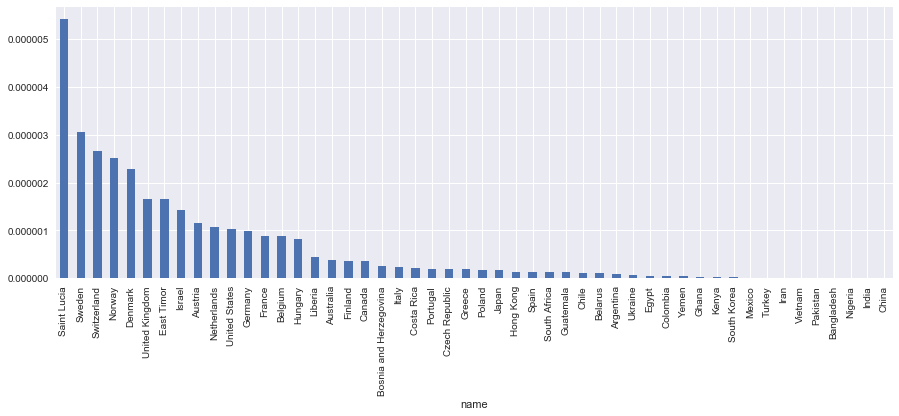

In [56]:
df_countries.sort_values(by='nobel_wins_per_capita', ascending=False) \
    .nobel_wins_per_capita.plot(kind='bar', figsize=(15,5))

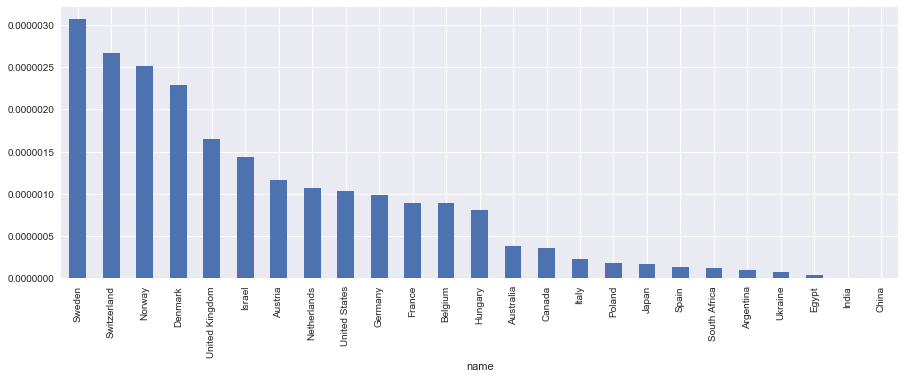

In [57]:
df_countries[df_countries.nobel_wins>2].sort_values(by='nobel_wins_per_capita', ascending=False) \
    .nobel_wins_per_capita.plot(kind='bar', figsize=(15,5))

In [58]:
nat_cat_sz = df.groupby(['country', 'catagory']).size()
type(nat_cat_sz)

pandas.core.series.Series

In [64]:
nat_cat_sz.index

MultiIndex(levels=[['Argentina', 'Australia', 'Austria', 'Bangladesh', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Czech Republic', 'Denmark', 'East Timor', 'Egypt', 'Finland', 'France', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Iran', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kenya', 'Liberia', 'Mexico', 'Myanmar (Burma)', 'Netherlands', 'Nigeria', 'Norway', 'Pakistan', 'Palestine', 'Poland', 'Portugal', 'Russia and Soviet Union', 'Saint Lucia', 'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'United States', 'Vietnam', 'Yemen'], ['Chemistry', 'Economic', 'Literature', 'Peace', 'Physics', 'Physiology or Medicine']],
           labels=[[0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 4, 5, 5, 5, 5, 5, 6, 7, 7, 7, 7, 7, 7, 8, 9, 9, 9, 10, 10, 11, 12, 12, 13, 13, 13, 13, 13, 14, 15, 15, 15, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18

In [65]:
nat_cat_sz = nat_cat_sz.unstack()
type(nat_cat_sz)

pandas.core.frame.DataFrame

In [66]:
nat_cat_sz

catagory,Chemistry,Economic,Literature,Peace,Physics,Physiology or Medicine
country,,,,,,
Argentina,1.0,NaN,NaN,2.0,NaN,1.0
Australia,NaN,1.0,1.0,NaN,1.0,6.0
Austria,1.0,NaN,1.0,2.0,3.0,3.0
Bangladesh,NaN,NaN,NaN,1.0,NaN,NaN
Belarus,NaN,NaN,1.0,NaN,NaN,NaN
Belgium,1.0,NaN,1.0,3.0,1.0,4.0
Bosnia and Herzegovina,NaN,NaN,1.0,NaN,NaN,NaN
Canada,4.0,1.0,1.0,1.0,3.0,3.0
Chile,NaN,NaN,2.0,NaN,NaN,NaN


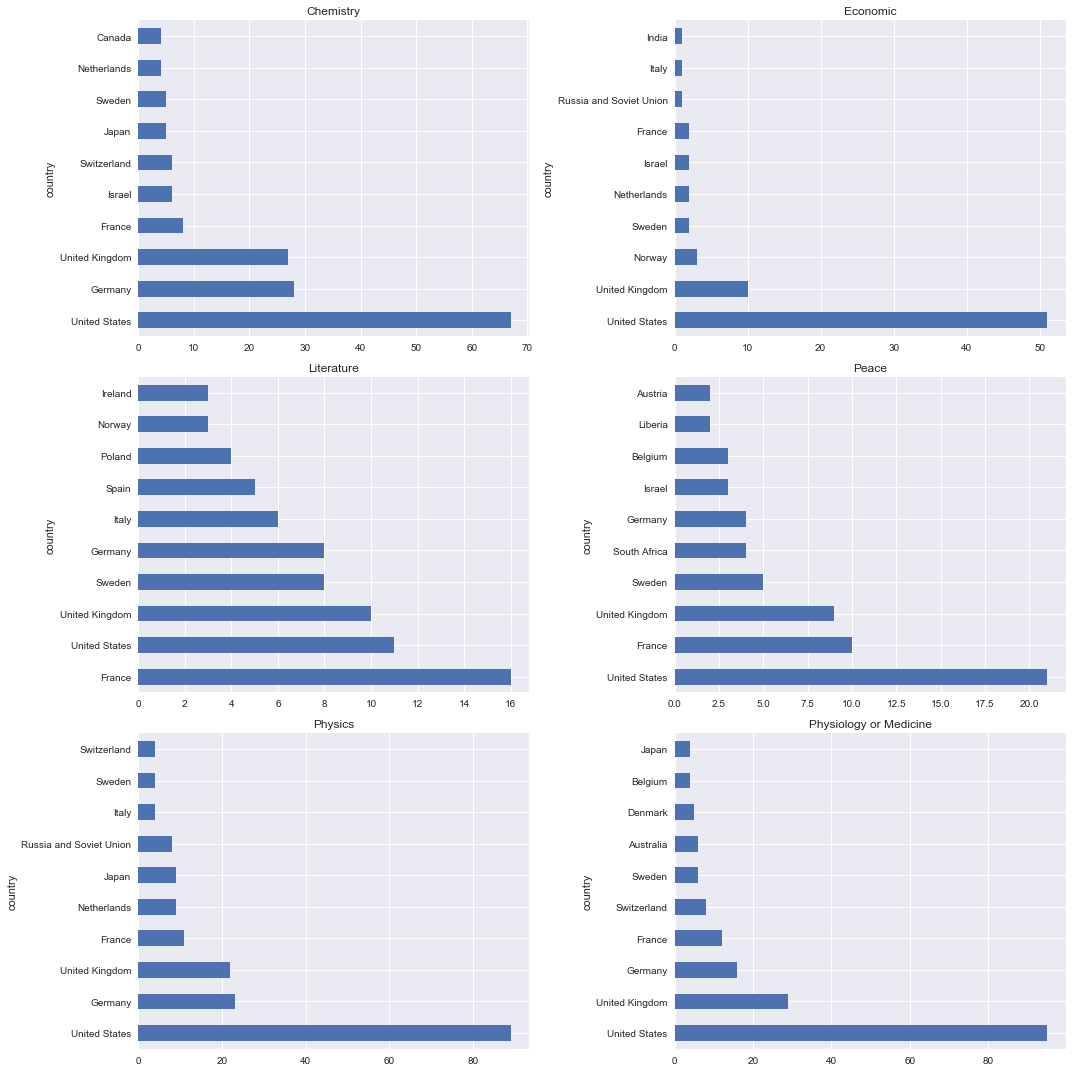

In [67]:
COL_NUM = 2
ROW_NUM = 3

fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(15,15))
for i, (label, col) in enumerate(nat_cat_sz.items()):
    ax = axes[i//COL_NUM, i%COL_NUM]
    col = col.sort_values(ascending=False)[:10]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

In [68]:
plt.rcParams['font.size'] = 20

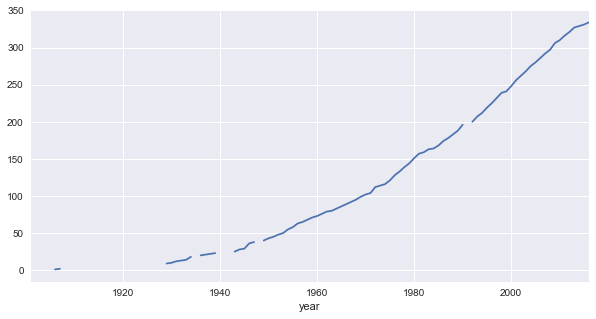

In [74]:
new_index = pd.Index(np.arange(1901, 2017), name='year')
by_year_nat_sz = df.groupby(['year', 'country']).size().unstack().reindex(new_index)
by_year_nat_sz['United States'].cumsum().plot(figsize=(10,5))

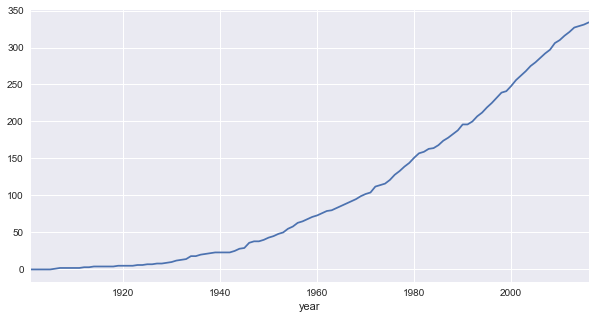

In [73]:
by_year_nat_sz['United States'].fillna(0).cumsum().plot(figsize=(10,5))

In [78]:
by_year_nat_sz = df.groupby(['year', 'country']).size().unstack().fillna(0)
not_US = by_year_nat_sz.columns.tolist()
not_US.remove('United States')
not_US

['Argentina',
 'Australia',
 'Austria',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Bosnia and Herzegovina',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Czech Republic',
 'Denmark',
 'East Timor',
 'Egypt',
 'Finland',
 'France',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kenya',
 'Liberia',
 'Mexico',
 'Myanmar (Burma)',
 'Netherlands',
 'Nigeria',
 'Norway',
 'Pakistan',
 'Palestine',
 'Poland',
 'Portugal',
 'Russia and Soviet Union',
 'Saint Lucia',
 'South Africa',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'Turkey',
 'Ukraine',
 'United Kingdom',
 'Vietnam',
 'Yemen']

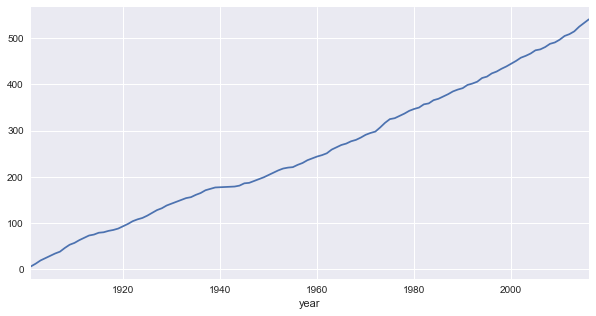

In [80]:
by_year_nat_sz['Not US'] = by_year_nat_sz[not_US].sum(axis=1)
by_year_nat_sz['Not US'].cumsum().plot(figsize=(10,5))

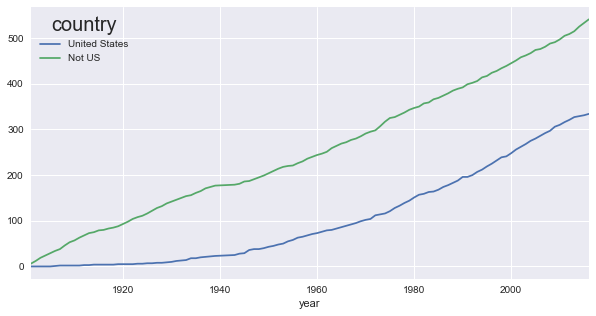

In [81]:
by_year_nat_sz[['United States', 'Not US']].cumsum().plot(figsize=(10,5))

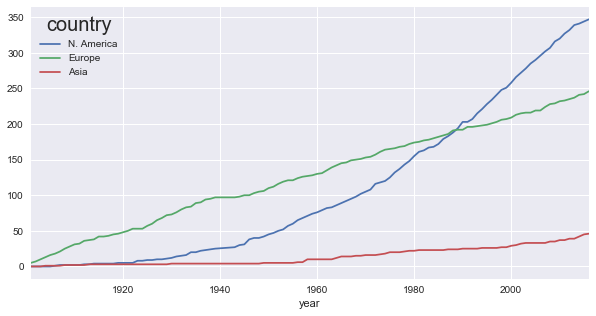

In [86]:
regions = [
    {'label': 'N. America', 'countries': ['United States', 'Canada']},
    {'label': 'Europe', 'countries': ['United Kingdom', 'Germany', 'France']},
    {'label': 'Asia', 'countries': ['Japan', 'Russia and Soviet Union', 'India', 'China']}
]

for region in regions:
    by_year_nat_sz[region['label']] = \
        by_year_nat_sz[region['countries']].sum(axis=1)

by_year_nat_sz[[r['label'] for r in regions]].cumsum().plot(figsize=(10,5))

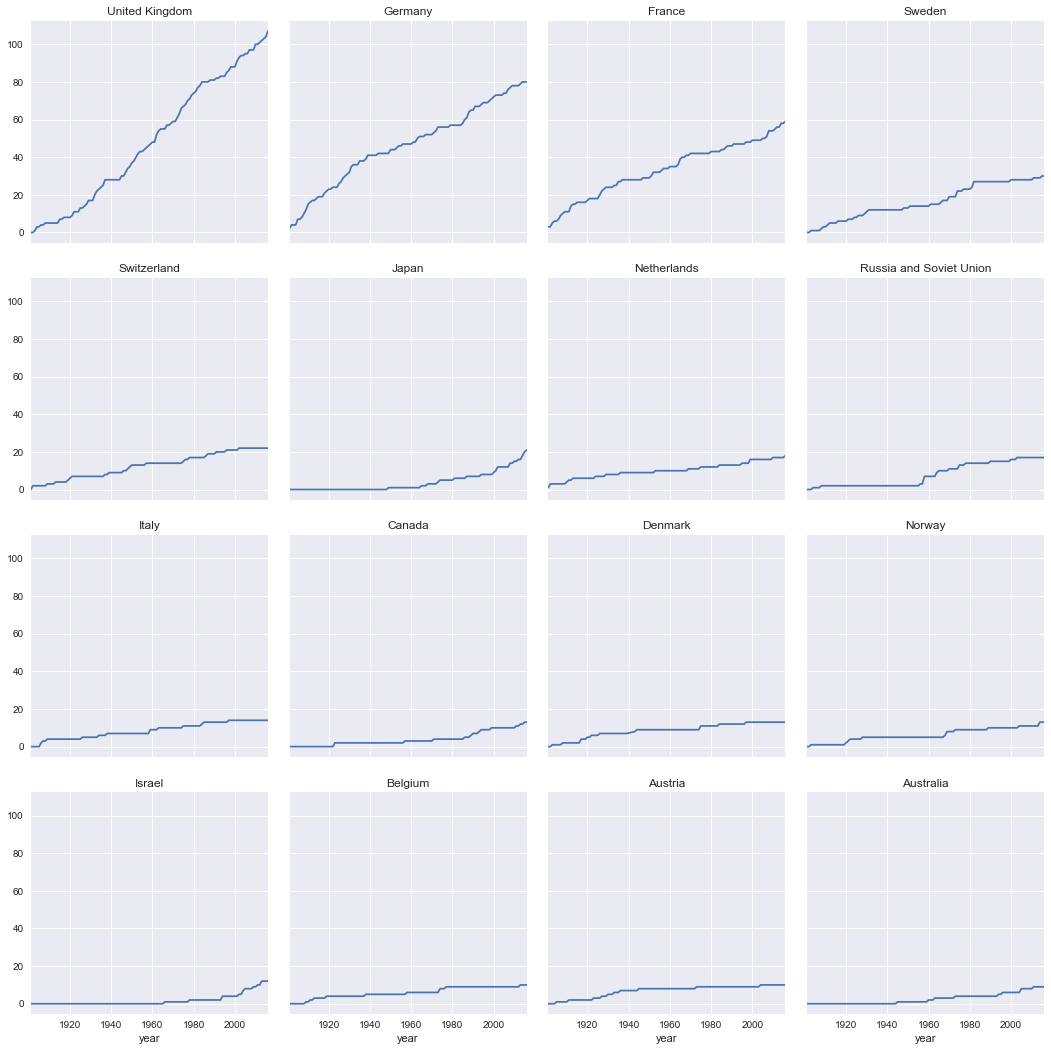

In [95]:
COL_NUM = 4
ROW_NUM = 4

by_nat_sz = df.groupby('country').size()
by_nat_sz.sort_values(ascending=False, inplace=True)

fig, axes = plt.subplots(ROW_NUM, COL_NUM,
                         sharex=True, sharey=True,
                         figsize=(15,15))

for i, nat in enumerate(by_nat_sz.index[1:17]):
    # print(nat)
    ax = axes[i//COL_NUM, i%COL_NUM]
    by_year_nat_sz[nat].cumsum().plot(ax=ax)
    ax.set_title(nat)
    
plt.tight_layout()

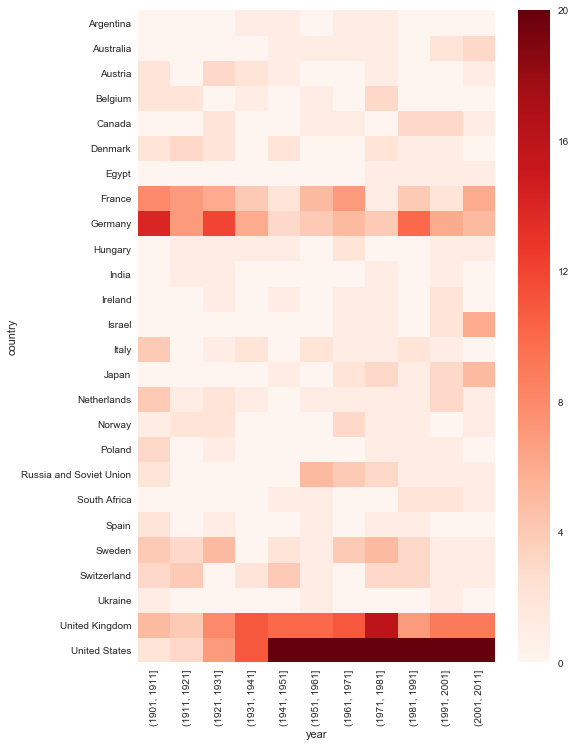

In [124]:
bins = np.arange(df.year.min(), df.year.max()+1, 10)
by_year_nat_binned = df.groupby(
    [pd.cut(df.year, bins, precision=0), 'country']).size().unstack(level=0).fillna(0)
plt.figure(figsize=(8,12))
sns.heatmap(by_year_nat_binned[by_year_nat_binned.sum(axis=1)>2], cmap='Reds', vmax=20, vmin=0)

In [104]:
by_year_nat_binned.sum(axis=1)>2

year
(1901, 1911]    True
(1911, 1921]    True
(1921, 1931]    True
(1931, 1941]    True
(1941, 1951]    True
(1951, 1961]    True
(1961, 1971]    True
(1971, 1981]    True
(1981, 1991]    True
(1991, 2001]    True
(2001, 2011]    True
dtype: bool

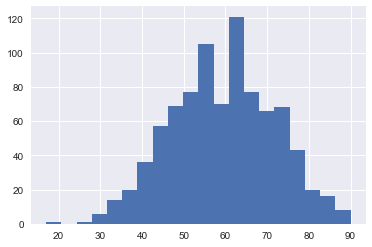

In [126]:
df['award_age'].hist(bins=20)

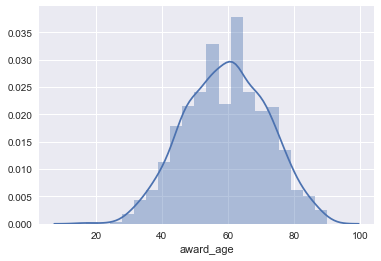

In [128]:
sns.distplot(df['award_age'], bins=20)

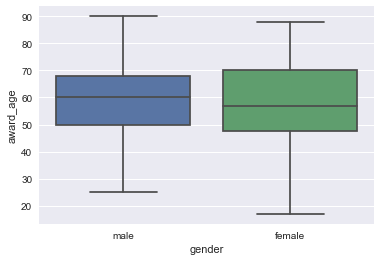

In [129]:
sns.boxplot(df.gender, df.award_age)

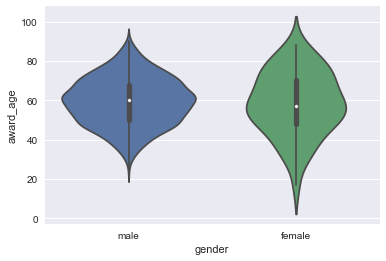

In [130]:
sns.violinplot(df.gender, df.award_age)

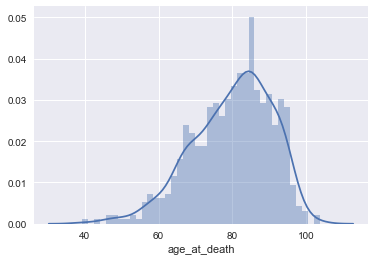

In [135]:
df['age_at_death'] = (df.date_of_death - df.date_of_birth).dt.days/365
age_at_death = df[df.age_at_death.notnull()].age_at_death
sns.distplot(age_at_death, bins=40)

In [136]:
df[df.age_at_death>100][['name', 'catagory', 'year', 'age_at_death']]

,name,catagory,year,age_at_death
229,Rita Levi-Montalcini,Physiology or Medicine,1986,103.761644
382,Ronald Coase,Economic,1991,102.747945


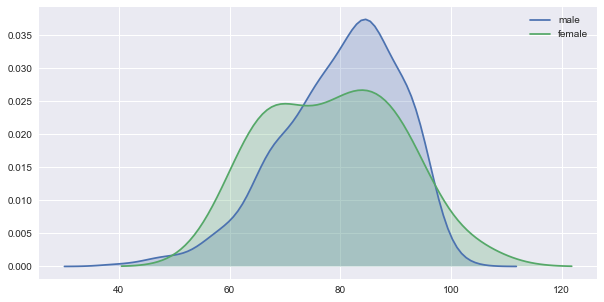

In [141]:
fig, axes = plt.subplots(figsize=(10,5))
df2 = df[df.age_at_death.notnull()]
sns.kdeplot(df2[df2.gender=='male'].age_at_death, shade=True, label='male')
sns.kdeplot(df2[df2.gender=='female'].age_at_death, shade=True, label='female')
plt.legend()

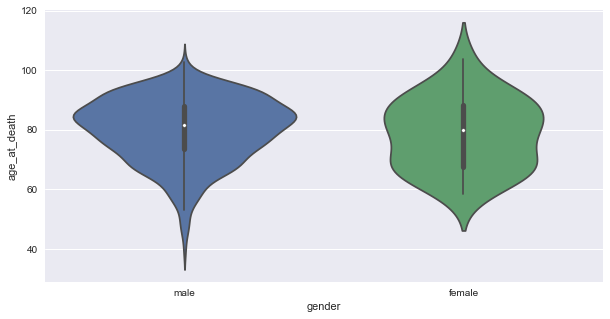

In [144]:
fig, axes = plt.subplots(figsize=(10,5))
sns.violinplot(df.gender, age_at_death)

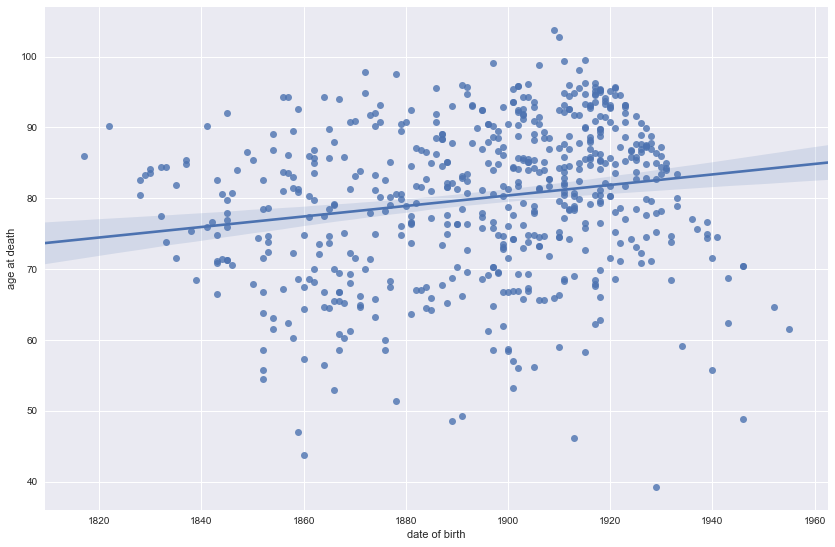

In [148]:
df_temp = df[df.age_at_death.notnull()]
data = pd.DataFrame(
    {'age at death': df_temp.age_at_death,
     'date of birth': df_temp.date_of_birth.dt.year})
sns.lmplot('date of birth', 'age at death', data, size=8, aspect=1.5)